# Machine Learning

## AUDI used car price prediction with Linear Regression model

#### Import required libraries and packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error


import matplotlib.pyplot as plt
import seaborn as sns

# to ignore unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

#### Read a csv file as pandas DataFrame

In [2]:
data_frame = pd.read_csv("audi.csv")

display(data_frame.head(10))
print(data_frame.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


(10668, 8)


#### Check for missing values, data types of the columns

In [3]:
display(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

In [4]:
print(data_frame.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


#### Count the number of unique values present in the 'model' column

In [5]:
count_models = data_frame['model'].value_counts()
display(count_models)

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

#### Count the number of unique values present in the 'transmission' column

In [6]:
count_transmission= data_frame['transmission'].value_counts()
display(count_transmission)

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

#### Count the number of unique values present in the 'fuelType' column

In [7]:
count_fuelType= data_frame['fuelType'].value_counts()
display(count_fuelType)

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

### Encoding categorical variables

We will use <b>one-hot encoding</b> because the columns are classified into multiclass.<br>
Also, since there is no ranking or order in the categorization, one-hot encoder is best suited for this analysis.

In [8]:
data_frame = pd.get_dummies(data_frame, drop_first=True)

#To reduce the redundancy, we are dropping the first column.
print(data_frame.shape)

(10668, 34)


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    10668 non-null  int64  
 1   price                   10668 non-null  int64  
 2   mileage                 10668 non-null  int64  
 3   mpg                     10668 non-null  float64
 4   engineSize              10668 non-null  float64
 5   model_ A2               10668 non-null  uint8  
 6   model_ A3               10668 non-null  uint8  
 7   model_ A4               10668 non-null  uint8  
 8   model_ A5               10668 non-null  uint8  
 9   model_ A6               10668 non-null  uint8  
 10  model_ A7               10668 non-null  uint8  
 11  model_ A8               10668 non-null  uint8  
 12  model_ Q2               10668 non-null  uint8  
 13  model_ Q3               10668 non-null  uint8  
 14  model_ Q5               10668 non-null

### Separating the features and target variable

In [10]:
target = ['price']

X = data_frame.drop('price', axis=1)
y = data_frame[target]

print(X.shape, y.shape)

(10668, 33) (10668, 1)


### Creating train and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
#given size of train set is 80% and test set is 20%
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


### Linear Regression

In [12]:
#creating linear regression model 
model = LinearRegression()
model = model.fit(X_train, y_train)

### Co-efficients of the Linear Regression

In [13]:
#here we'll find the co-efficients of the LR model 
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
29,transmission_Manual,-1229.654264
24,model_ S5,-611.919358
32,fuelType_Petrol,-230.113548
2,mpg,-166.582957
1,mileage,-0.073496
30,transmission_Semi-Auto,103.552761
11,model_ Q2,676.007814
5,model_ A3,1199.117506
6,model_ A4,1376.631713
0,year,2051.059735


### y-intercept value of the Linear Regression model

In [14]:
model.intercept_

array([-4115510.56664835])

### Prediction

In [15]:
y_pred = model.predict(X_test)

In [16]:
#printing to see predicted value
print(y_pred)

[[24644.10866232]
 [19394.57462197]
 [25065.39686792]
 ...
 [19735.69117655]
 [30248.0859623 ]
 [59435.90547415]]


### Error of the Prediction 

In [17]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# # mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error= ", MAPE, "%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)


mean absolute error =  2610.9859009749484
mean absolute percentage error=  0.1332550428458616 %
mean squared error =  16648104.536601687
root mean squared error =  4080.2088839423022
coefficient of determination =  0.8694816519096582


### Visual Comparison

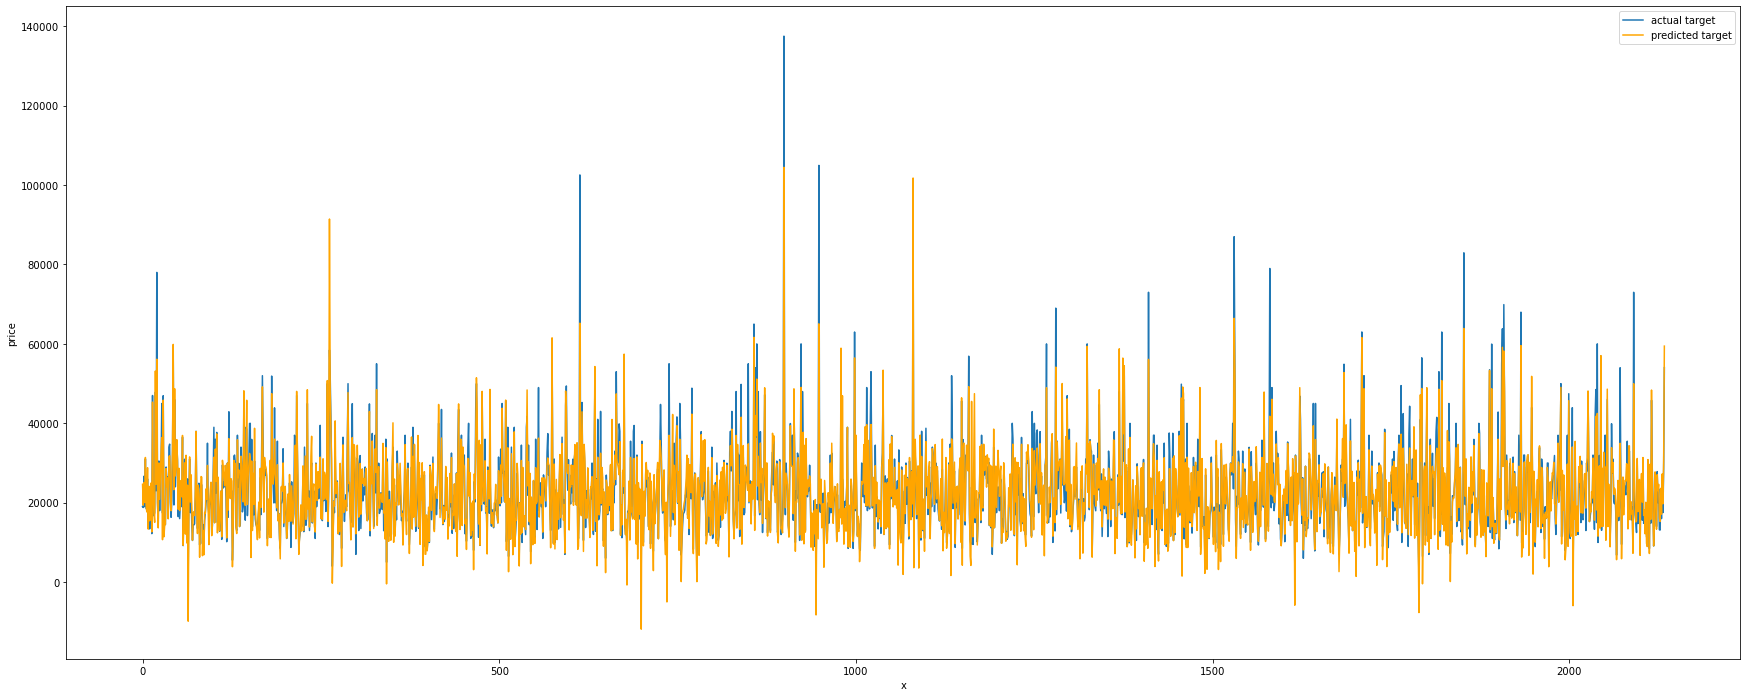

In [18]:
# we will compare the model visually via a Line Plot
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target', color='orange')
plt.show()